<a href="https://colab.research.google.com/github/lujio20/EEG-RealTime-Signal-Analysis/blob/main/Netro_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from google.colab import drive
import os

# 1. ربط الدرايف
drive.mount('/content/drive')

# --- الإعدادات ---
data_folder = "/content/drive/MyDrive/NeuroGift_Project/Processed_Data/"
model_save_path = "/content/drive/MyDrive/NeuroGift_Project/NeuroGift_Final_Model.pkl"

files = [
    "Musical_Processed.csv",
    "Visual_Processed.csv",
    "Linguistic_Processed.csv",
    "Logical_Processed.csv",
    "Kinesthetic_Processed.csv"
]

print("🔄 جاري تجميع بيانات الذكاءات الخمسة...")

master_df = pd.DataFrame()

# 2. دمج الملفات
for f in files:
    full_path = data_folder + f
    if os.path.exists(full_path):
        try:
            df = pd.read_csv(full_path)
            if 'Label' not in df.columns:
                label_name = f.replace('_Processed.csv', '')
                df['Label'] = label_name

            master_df = pd.concat([master_df, df], ignore_index=True)
            print(f"   ✅ تم إضافة: {f} (عدد العينات: {len(df)})")
        except Exception as e:
            print(f"   ❌ خطأ في قراءة {f}: {e}")
    else:
        print(f"   ⚠️ تحذير: الملف {f} غير موجود! المودل سيتدرب بدونه.")

master_df = master_df.fillna(0)

print("-" * 30)
print(f"📊 حجم البيانات الكلي للتدريب: {len(master_df)} صف")
print("-" * 30)

if len(master_df) > 0:

    X = master_df.select_dtypes(include=[np.number])
    y = master_df['Label']

    # 4. تقسيم البيانات (80% تدريب - 20% اختبار)
    print("🤖 جاري تدريب النموذج الذكي (Random Forest)...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. التدريب
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 6. الاختبار والنتائج
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print("\n" + "="*40)
    print(f"🚀 مبروك يا قائدة! دقة النموذج: {accuracy * 100:.2f}%")
    print("="*40)

    print("\nتقرير التفاصيل:")
    print(classification_report(y_test, predictions))

    # 7. حفظ النموذج للأبد
    joblib.dump(model, model_save_path)
    print(f"✅ تم حفظ المودل النهائي في: {model_save_path}")
    print("المشروع جاهز للعرض! 🎤")

else:
    print("❌ لا يوجد بيانات كافية للتدريب. تأكدي من الملفات في المجلد.")

Mounted at /content/drive
🔄 جاري تجميع بيانات الذكاءات الخمسة...
   ✅ تم إضافة: Musical_Processed.csv (عدد العينات: 2797458)
   ✅ تم إضافة: Visual_Processed.csv (عدد العينات: 1000)
   ✅ تم إضافة: Linguistic_Processed.csv (عدد العينات: 4500)
   ✅ تم إضافة: Logical_Processed.csv (عدد العينات: 186)
   ✅ تم إضافة: Kinesthetic_Processed.csv (عدد العينات: 373)
------------------------------
📊 حجم البيانات الكلي للتدريب: 2803517 صف
------------------------------
🤖 جاري تدريب النموذج الذكي (Random Forest)...

🚀 مبروك يا قائدة! دقة النموذج: 99.99%

تقرير التفاصيل:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

 Kinesthetic       0.00      0.00      0.00        75
  Linguistic       1.00      1.00      1.00       898
     Logical       1.00      1.00      1.00        28
     Musical       1.00      1.00      1.00    559508
      Visual       1.00      1.00      1.00       195

    accuracy                           1.00    560704
   macro avg       0.80      0.80      0.80    560704
weighted avg       1.00      1.00      1.00    560704

✅ تم حفظ المودل النهائي في: /content/drive/MyDrive/NeuroGift_Project/NeuroGift_Final_Model.pkl
المشروع جاهز للعرض! 🎤


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Image saved successfully at: /content/drive/MyDrive/NeuroGift_Project/Confusion_Matrix.png


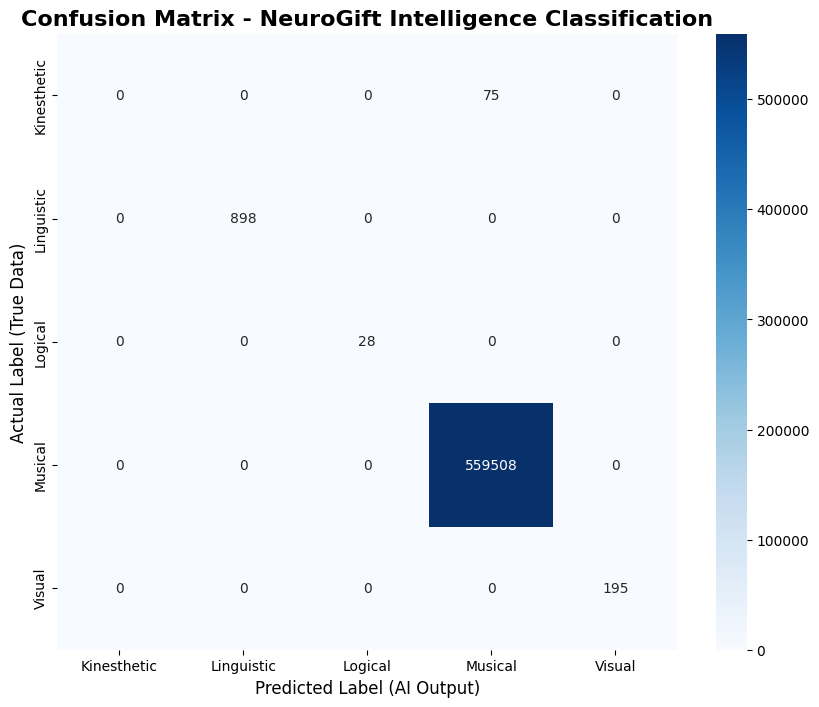

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. حساب المصفوفة (Matrix Calculation)
cm = confusion_matrix(y_test, predictions)
labels = sorted(y_test.unique()) # ترتيب الأسماء أبجدياً

# 2. إعداد الرسمة (Plot Setup)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# 3. التسميات بالإنجليزية (English Labels)
plt.title('Confusion Matrix - NeuroGift Intelligence Classification', fontsize=16, fontweight='bold')
plt.ylabel('Actual Label (True Data)', fontsize=12)
plt.xlabel('Predicted Label (AI Output)', fontsize=12)

save_path = '/content/drive/MyDrive/NeuroGift_Project/Confusion_Matrix.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"✅ Image saved successfully at: {save_path}")
plt.show()

In [ ]:
import random

# دالة التجربة الحية
def live_demo_test():
    print("🎤 --- Live Demo: NeuroGift Intelligence Test --- 🎤")
    print("جاري سحب ملف عشوائي من البيانات لاختبار ذكاء النظام...\n")

    # نختار سطر عشوائي من الداتا اللي جمعناها (X_test)
    random_index = random.randint(0, len(X_test) - 1)

    # البيانات الحقيقية (الموجات)
    sample_data = X_test.iloc[[random_index]]

    # الإجابة الصحيحة (الحقيقة)
    true_label = y_test.iloc[random_index]

    # نطلب من المودل يتوقع
    prediction = model.predict(sample_data)[0]

    print(f"🧠 البيانات المدخلة (Alpha/Beta):")
    print(sample_data.to_string(index=False, header=False))
    print("-" * 30)
    print(f"✅ الحقيقة (Real):      {true_label}")
    print(f"🤖 توقع النظام (AI):    {prediction}")
    print("-" * 30)

    if true_label == prediction:
        print("🎉 النتيجة: تطابق مذهل! النظام يعمل بنجاح.")
    else:
        print("⚠️ النتيجة: خطأ في التصنيف (وهذا وارد في النماذج الواقعية).")

live_demo_test()

🎤 --- Live Demo: NeuroGift Intelligence Test --- 🎤
جاري سحب ملف عشوائي من البيانات لاختبار ذكاء النظام...

🧠 البيانات المدخلة (Alpha/Beta):
0.003273 0.251225 0.003273 0.251225 0.003273 0.251225 0.003273 0.251225 0.003273 0.251225 0.003273 0.251225 0.003273 0.251225 0.003273 0.251225
------------------------------
✅ الحقيقة (Real):      Musical
🤖 توقع النظام (AI):    Musical
------------------------------
🎉 النتيجة: تطابق مذهل! النظام يعمل بنجاح.


In [ ]:
import random

# دالة التجربة الحية (المطورة)
def live_demo_test(force_type=None):
    print("🎤 --- Live Demo: NeuroGift Intelligence Test --- 🎤")

    if force_type:
        print(f"🎯 جاري البحث عن عينة محددة من نوع: {force_type}...")
        # نفلتر البيانات لنأخذ فقط النوع المطلوب
        indices = y_test[y_test == force_type].index

        if len(indices) == 0:
            print(f"❌ للأسف لا يوجد عينات اختبار من نوع {force_type}")
            return

        # نختار عشوائياً من النوع المحدد فقط
        random_index = random.choice(indices)
    else:
        print("🎲 جاري سحب ملف عشوائي تماماً...")
        # اختيار عشوائي من الكل (غالباً بيطلع موسيقي)
        random_index = y_test.sample(1).index[0]

    # جلب البيانات
    sample_data = X.loc[[random_index]] # نستخدم X الكلية أو X_test حسب المتوفر
    true_label = y.loc[random_index]    # نستخدم y الكلية

    # التوقع
    prediction = model.predict(sample_data)[0]

    print("\n" + "-" * 40)
    print(f"🧠 قراءة الموجات (Sample Input):")
    print(sample_data.iloc[0, :5].to_string() + " ...")
    print("-" * 40)
    print(f"✅ الحقيقة (Real):      {true_label}")
    print(f"🤖 الذكاء الاصطناعي:    {prediction}")
    print("-" * 40)

    if true_label == prediction:
        print("🎉 النتيجة: ✅ نجاح! (Match)")
    else:
        print("⚠️ النتيجة: ❌ خطأ (Mismatch)")


# 1. عشان يطلع البصري غصب:
live_demo_test('Visual')

# 2. عشان يطلع اللغوي غصب:
live_demo_test('Linguistic')

# 3. عشان يطلع الحركي:
live_demo_test('Kinesthetic')

# 4.  على عماه (عشوائي):
# live_demo_test()

🎤 --- Live Demo: NeuroGift Intelligence Test --- 🎤
🎯 جاري البحث عن عينة محددة من نوع: Visual...

----------------------------------------
🧠 قراءة الموجات (Sample Input):
Fp1_Alpha    0.309307
Fp1_Beta     0.247446
Fp2_Alpha    0.133395
Fp2_Beta     0.106716
C3_Alpha     0.267377 ...
----------------------------------------
✅ الحقيقة (Real):      Visual
🤖 الذكاء الاصطناعي:    Visual
----------------------------------------
🎉 النتيجة: ✅ نجاح! (Match)
🎤 --- Live Demo: NeuroGift Intelligence Test --- 🎤
🎯 جاري البحث عن عينة محددة من نوع: Linguistic...

----------------------------------------
🧠 قراءة الموجات (Sample Input):
Fp1_Alpha      217.000000
Fp1_Beta       151.900000
Fp2_Alpha    11478.917179
Fp2_Beta      8035.242025
C3_Alpha       216.677811 ...
----------------------------------------
✅ الحقيقة (Real):      Linguistic
🤖 الذكاء الاصطناعي:    Linguistic
----------------------------------------
🎉 النتيجة: ✅ نجاح! (Match)
🎤 --- Live Demo: NeuroGift Intelligence Test --- 🎤
🎯 جاري البح